In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# Date: February 2024
# License: MIT

In [1]:
import numpy as np

np.random.seed(42)

In [2]:
from sklearn.base import BaseEstimator, RegressorMixin

class LinearRegressionBatchGD(BaseEstimator, RegressorMixin):
    """Linear regression using batch gradient descent"""
    def __init__(self, alpha=0.1, max_iter=1000, tol=0.0001):
        self.alpha = alpha        # Learning rate
        self.max_iter = max_iter  # Maximum number of iterations
        self.tol = tol            # Tolerance for stopping criterion 
        self.losses = []          # Track the loss over iterations
        
    def fit(self, X, y):
        n = X.shape[0]  # number of samples
        d = X.shape[1]  # number of features
        
        # Add an intercept term (bias) to X
        X_b = np.c_[np.ones(n), X]
        
        # Initialize the parameter vector with random values
        self.w_ = np.random.randn(d + 1)
        
        for i in range(self.max_iter):
            # Compute predictions
            y_pred = X_b @ self.w_  
            
            # Calculate loss
            loss = np.mean((y_pred - y)**2)
            self.losses.append(loss)
            
            # Check for convergence
            if i > 0 and (self.losses[-2] - loss) < self.tol:
                break
            
            # Compute gradients                 
            gradients = 1 / n * X_b.T @ (y_pred - y)
            
            # Update weights
            self.w_ -= self.alpha * gradients
        
    def predict(self, X):
        n = X.shape[0]      
        X_b = np.c_[np.ones(n), X]  # Add the intercept term
        y_pred = X_b @ self.w_
        return y_pred      

In [3]:
def generate_data(n=100):
    # Generate synthetic data with two features and linearly correlated label
    np.random.seed(42)  

    x1 = 2 * np.random.rand(n)
    x2 = 3 * np.random.rand(n)
    y = 5 + 1 * x1 + 2 * x2 + np.random.randn(n)
    X = np.c_[x1, x2]  
    return X, y

In [4]:
X, y = generate_data()

model = LinearRegressionBatchGD()
model.fit(X, y)

In [5]:
print('Coefficients:', model.w_)

Coefficients: [4.74552811 0.91036205 2.28626535]


In [6]:
print('Number of iterations for convergence:', len(model.losses))

Number of iterations for convergence: 182


In [7]:
from sklearn.metrics import mean_squared_error as MSE

y_pred = model.predict(X)
rmse = MSE(y, y_pred, squared=False)
print(f'RMSE: {rmse:.4f}')

r2_score = model.score(X, y)
print(f'R2 score: {r2_score:.4f}')

RMSE: 0.9746
R2 score: 0.8085


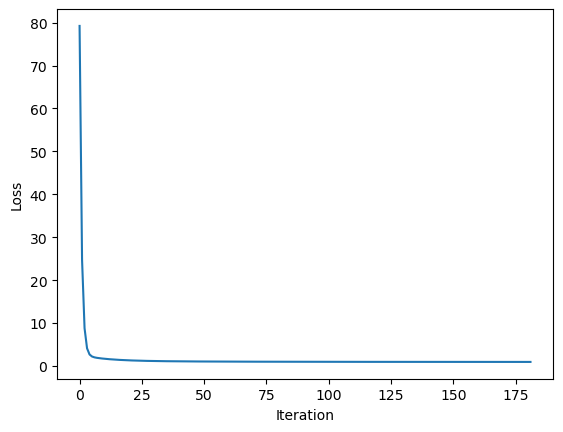

In [8]:
import matplotlib.pyplot as plt

# Plot the learning curve
plt.plot(model.losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.savefig('figures/batch_gd_learning_curve.pdf')